In [288]:
import pandas as pd
#import quilt3 as q3
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from scipy.stats import zscore
import plotly.graph_objects as go
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

# 1. EXTRACTING DATA & MODIFYING DATA

In [241]:
file_path = 'hurricane_pop_dense_fatalities.csv' 
hurricane_data = pd.read_csv(file_path)

In [242]:
hurricane_data.head()

,Hurricane_YEAR,Landfall_City,Lat,Lon,Landfall_Pop_Dens_sq_mile,Pathway_Towns,Pathway_Town_Population_Densities,Fatalities,Max_Wind_Speed_mph,Pressure_mb,Storm_Surge_ft,Precipitation_Total_in
0,Milton (2024),"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36
1,Helene (2024),"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30
2,Idalia (2023),"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32
3,Ian (2022),"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45
4,Nicole (2022),"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30


In [243]:
# Separating Name and Year into seperate columns 

hurricane_data[['Hurricane_Name', 'Year']] = hurricane_data['Hurricane_YEAR'].str.extract(r'([A-Za-z\s]+)\s\((\d{4})\)')
hurricane_data.head()

,Hurricane_YEAR,Landfall_City,Lat,Lon,Landfall_Pop_Dens_sq_mile,Pathway_Towns,Pathway_Town_Population_Densities,Fatalities,Max_Wind_Speed_mph,Pressure_mb,Storm_Surge_ft,Precipitation_Total_in,Hurricane_Name,Year
0,Milton (2024),"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36,Milton,2024
1,Helene (2024),"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30,Helene,2024
2,Idalia (2023),"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32,Idalia,2023
3,Ian (2022),"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45,Ian,2022
4,Nicole (2022),"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30,Nicole,2022


In [244]:
#Dropping and rearranging columns 

hurricane_data = hurricane_data.drop(columns=['Hurricane_YEAR'])
hurricane_data.head()

,Landfall_City,Lat,Lon,Landfall_Pop_Dens_sq_mile,Pathway_Towns,Pathway_Town_Population_Densities,Fatalities,Max_Wind_Speed_mph,Pressure_mb,Storm_Surge_ft,Precipitation_Total_in,Hurricane_Name,Year
0,"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36,Milton,2024
1,"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30,Helene,2024
2,"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32,Idalia,2023
3,"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45,Ian,2022
4,"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30,Nicole,2022


In [245]:
print(hurricane_data.columns)

Index(['Landfall_City', 'Lat', 'Lon', 'Landfall_Pop_Dens_sq_mile',
       'Pathway_Towns ', 'Pathway_Town_Population_Densities', 'Fatalities',
       'Max_Wind_Speed_mph', 'Pressure_mb', 'Storm_Surge_ft',
       'Precipitation_Total_in', 'Hurricane_Name', 'Year'],
      dtype='object')


In [246]:
columns_order = [
    'Year', 'Hurricane_Name', 'Landfall_City', 'Lat', 'Lon',
    'Landfall_Pop_Dens_sq_mile', 'Pathway_Towns ',
    'Pathway_Town_Population_Densities', 'Fatalities', 
    'Max_Wind_Speed_mph', 'Pressure_mb', 'Storm_Surge_ft',
    'Precipitation_Total_in'
]
hurricane_data = hurricane_data[columns_order]
hurricane_data.head()

,Year,Hurricane_Name,Landfall_City,Lat,Lon,Landfall_Pop_Dens_sq_mile,Pathway_Towns,Pathway_Town_Population_Densities,Fatalities,Max_Wind_Speed_mph,Pressure_mb,Storm_Surge_ft,Precipitation_Total_in
0,2024,Milton,"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36
1,2024,Helene,"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30
2,2023,Idalia,"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32
3,2022,Ian,"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45
4,2022,Nicole,"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30


In [247]:
# Adding Categories 

def categorize_storm(wind_speed):
    if wind_speed <= 38:
        return 'Tropical Depression'
    elif 39 <= wind_speed <= 73:
        return 'Tropical Storm'
    elif 74 <= wind_speed <= 95:
        return 'Category 1'
    elif 96 <= wind_speed <= 110:
        return 'Category 2'
    elif 111 <= wind_speed <= 129:
        return 'Category 3'
    elif 130 <= wind_speed <= 156:
        return 'Category 4'
    else:
        return 'Category 5'

# Apply the categorization function to create a new column
hurricane_data['Category'] = hurricane_data['Max_Wind_Speed_mph'].apply(categorize_storm)

# Display the first few rows of the updated dataset
print(hurricane_data[['Hurricane_Name', 'Max_Wind_Speed_mph', 'Category']].head())


  Hurricane_Name  Max_Wind_Speed_mph    Category
0         Milton                 140  Category 4
1         Helene                 130  Category 4
2         Idalia                 130  Category 4
3            Ian                 155  Category 4
4         Nicole                  75  Category 1


In [255]:
hurricane_data.head()

,Year,Hurricane_Name,Landfall_City,Lat,Lon,Landfall_Pop_Dens_sq_mile,Pathway_Towns,Pathway_Town_Population_Densities,Fatalities,Max_Wind_Speed_mph,Pressure_mb,Storm_Surge_ft,Precipitation_Total_in,Category,Decade
0,2024,Milton,"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36,Category 4,2020
1,2024,Helene,"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30,Category 4,2020
2,2023,Idalia,"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32,Category 4,2020
3,2022,Ian,"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45,Category 4,2020
4,2022,Nicole,"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30,Category 1,2020


In [256]:
hurricane_data.to_csv('hurricane_pop_dense_fatalities_updated.csv', index=False)

In [257]:
# Reading updated Hurricane DF 
file_path = 'hurricane_pop_dense_fatalities_updated.csv' 
hurricane_data = pd.read_csv(file_path)
hurricane_data.head()

,Year,Hurricane_Name,Landfall_City,Lat,Lon,Landfall_Pop_Dens_sq_mile,Pathway_Towns,Pathway_Town_Population_Densities,Fatalities,Max_Wind_Speed_mph,Pressure_mb,Storm_Surge_ft,Precipitation_Total_in,Category,Decade
0,2024,Milton,"Tampa, FL",27.95,-82.46,1500,"St. Petersburg, FL",4200,75,140,950,10,36,Category 4,2020
1,2024,Helene,"Panama City, FL",30.16,-85.66,1100,"Tallahassee, FL",1900,60,130,960,8,30,Category 4,2020
2,2023,Idalia,"Big Bend, FL",29.85,-83.59,1200,"Tallahassee, FL",1900,27,130,950,12,32,Category 4,2020
3,2022,Ian,"Fort Myers, FL",26.64,-81.87,1400,"Orlando, FL",1200,148,155,937,18,45,Category 4,2020
4,2022,Nicole,"Vero Beach, FL",27.64,-80.39,1100,"Orlando, FL",1200,10,75,985,6,30,Category 1,2020


# 2. CREATING VISUALS - THESE GRAPHS WERE CREATED ORIGINALLY (SEE LAST SECTION) BY ME AND MODIFIED BELOW USING CHATGPT TO GET SPECIFIC GRAPH STYLES FROM THE PYTHON GRAPHS LIBRARY, COMBINES VARIOUS GRPAHS INTO 1 AND TO MAKE THEM INTERACTIVE. 

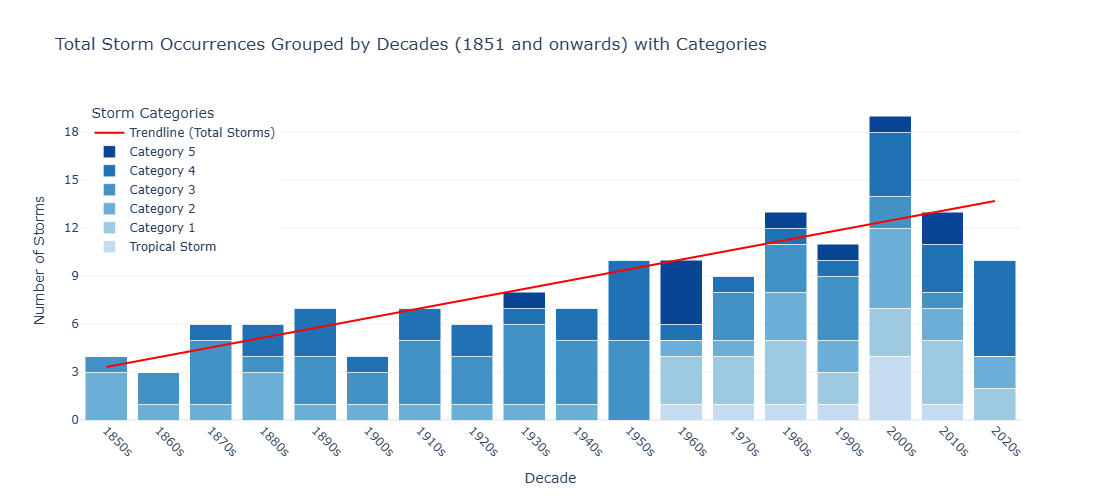

In [311]:
# PLOTTING FREQUENCY OF STORM OCCURRENCES BY STORM CATGORIES THROUGHOUT THE DECADES - - INTERACTIVE GRAPH 

hurricane_data['Decade'] = (hurricane_data['Year'] // 10) * 10
category_counts = hurricane_data.groupby(['Decade', 'Category']).size().unstack(fill_value=0)

# Group into Decades and define categories
decades = category_counts.index
categories = ['Tropical Storm', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

# Reorder the columns of category_counts based on the specified order
category_counts = category_counts.reindex(columns=categories, fill_value=0)

# Calculate total occurrences per decade for the trendline
total_occurrences = category_counts.sum(axis=1)

# Fit a linear regression line (trendline)
z = np.polyfit(decades, total_occurrences, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)
trendline = p(decades)

# Define colors from lightest to darkest
colors = ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594']

bar_traces = []
for i, category in enumerate(categories):
    bar_traces.append(
        go.Bar(
            x=decades,
            y=category_counts[category],
            name=category,
            marker=dict(color=colors[i]),
            hovertemplate=f'Decade: %{{x}}<br>Count: %{{y}}<extra>{category}</extra>',
        )
    )

# Adding the trendline 
trendline_trace = go.Scatter(
    x=decades,
    y=trendline,
    mode='lines',
    name='Trendline (Total Storms)',
    line=dict(color='red', width=2),
    hovertemplate='Decade: %{x}<br>Trend: %{y:.2f}<extra></extra>',
)

# Defining y-axis tick values for increments of 3
max_y = max(total_occurrences)
y_ticks = list(range(0, int(max_y) + 4, 3))  

# Plot the layout
layout = go.Layout(
    title='Total Storm Occurrences Grouped by Decades (1851 and onwards) with Categories',
    xaxis=dict(
        title='Decade',
        tickvals=decades,
        ticktext=[f"{decade}s" for decade in decades],
        tickangle=45,  # Rotate tick labels for better spacing
    ),
    yaxis=dict(
        title='Number of Storms',
        tickvals=y_ticks,  # Set the tick values to increments of 3
    ),
    height=500,  # Increase height to add spacing between y-axis ticks
    barmode='stack',  # Stack the bars
    legend=dict(x=0.01, y=1, title='Storm Categories'),
    template='plotly_white'
)

# Show the interactive plot
fig = go.Figure(data=bar_traces + [trendline_trace], layout=layout)
fig.show()

In [313]:
summary_table = category_counts.copy()
summary_table['Total Storms'] = summary_table.sum(axis=1)

# Print the table
print("Decade-wise Storm Summary by Category")
print(summary_table.to_string(index=True))


Decade-wise Storm Summary by Category
Category  Tropical Storm  Category 1  Category 2  Category 3  Category 4  Category 5  Total Storms
Decade                                                                                            
1850                   0           0           3           1           0           0             4
1860                   0           0           1           2           0           0             3
1870                   0           0           1           4           1           0             6
1880                   0           0           3           1           2           0             6
1890                   0           0           1           3           3           0             7
1900                   0           0           1           2           1           0             4
1910                   0           0           1           4           2           0             7
1920                   0           0           1           3           

In [259]:
# Saving the above graph as html to view the interactive graph on gamma

import plotly.graph_objects as go
fig.write_html("storm_occurrences_by_decades.html")

# Optional: Print a message to confirm
print("HTML file saved as 'storm_occurrences_by_decades.html'")

HTML file saved as 'storm_occurrences_by_decades.html'


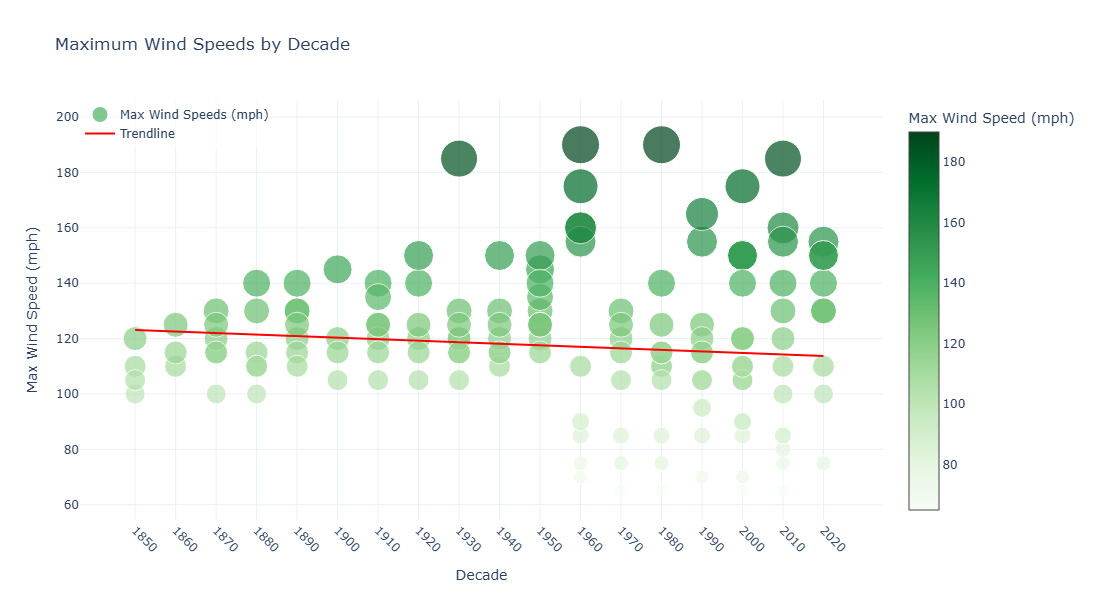

In [260]:
# PLOTTING MAXIMUM WIND SPEED TRENDS OVER THE DECADES - INTERACTIVE GRAPH 

decades = hurricane_data['Decade']
max_wind_speeds = hurricane_data['Max_Wind_Speed_mph']
storm_names = hurricane_data['Hurricane_Name']  # Use the correct column name for storm names

# Fit a linear regression line (trendline) for wind speeds
z = np.polyfit(decades, max_wind_speeds, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)
trendline = p(sorted(decades.unique()))

# Create a scatter plot with smaller dots and hover showing storm name and wind speed
scatter = go.Scatter(
    x=decades,
    y=max_wind_speeds,
    mode='markers',
    marker=dict(
        size=max_wind_speeds / 5,  
        color=max_wind_speeds,   
        colorscale='Greens',      
        showscale=True,         
        colorbar=dict(title='Max Wind Speed (mph)')
    ),
    name='Max Wind Speeds (mph)',
    hovertemplate='Storm: %{text}<br>Max Wind Speed: %{y} mph<extra></extra>',
    text=storm_names  
)

# Create the trendline
trendline_plot = go.Scatter(
    x=sorted(decades.unique()),
    y=trendline,
    mode='lines',
    line=dict(color='red', width=2),
    name='Trendline',
    hovertemplate='Decade: %{x}<br>Trend: %{y:.2f} mph<extra></extra>'
)

# Layout with legend on the left
layout = go.Layout(
    title='Maximum Wind Speeds by Decade',
    xaxis=dict(title='Decade', tickvals=sorted(decades.unique()), tickangle=45),
    yaxis=dict(title='Max Wind Speed (mph)'),
    template='plotly_white',
    height=600,
    legend=dict(
        x=0,   # Position legend on the left
        y=1,   # Top alignment
        xanchor='left',  # Align the legend box to the left
        yanchor='top',   # Align the legend box to the top
        bgcolor='rgba(255,255,255,0.5)'  # Add a translucent white background for better readability
    )
)

# Combine into a figure
fig = go.Figure(data=[scatter, trendline_plot], layout=layout)

# Show the interactive plot
fig.show()

In [261]:
# Saving the above graph as html to view the interactive graph on gamma
fig.write_html("Maximum Wind Speeds by Decade.html")

# Optional: Print a message to confirm
print("HTML file saved as 'Maximum Wind Speeds by Decade.html'")

HTML file saved as 'Maximum Wind Speeds by Decade.html'


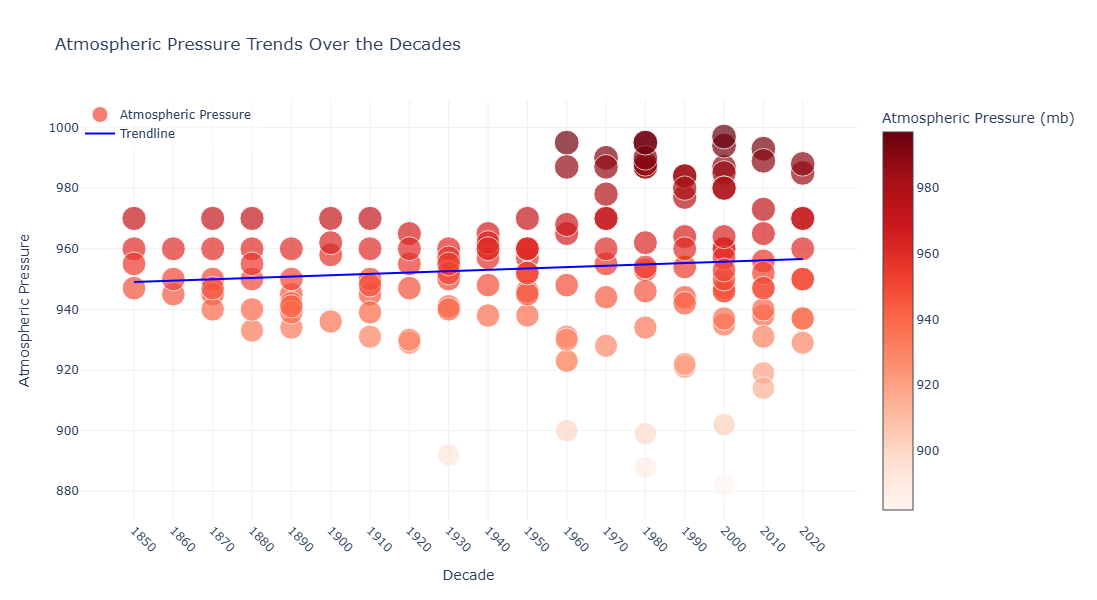

In [262]:
# PLOTTING WIND ATMOSPHERIC PRESSURE TRENDS OVER THE DECADES - INTERACTIVE GRAPH 

pressure_values = hurricane_data['Pressure_mb']

#linear regression line (trendline) for pressure
z = np.polyfit(decades, pressure_values, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)
trendline = p(sorted(decades.unique()))

# Create a scatter plot with smaller dots
scatter = go.Scatter(
    x=decades,
    y=pressure_values,
    mode='markers',
    marker=dict(
        size=pressure_values / 40,  
        color=pressure_values,     
        colorscale='Reds',       
        showscale=True,          
        colorbar=dict(title='Atmospheric Pressure (mb)')
    ),
    name='Atmospheric Pressure',
    hovertemplate='Storm: %{text}<br>Max Wind Speed: %{y} mph<extra></extra>',
    text=storm_names  # Pass storm names to be displayed in the hovertemplate
)

# Create the trendline
trendline_plot = go.Scatter(
    x=sorted(decades.unique()),
    y=trendline,
    mode='lines',
    line=dict(color='blue', width=2),
    name='Trendline',
    hovertemplate='Decade: %{x}<br>Trend: %{y:.2f} mb<extra></extra>'
)

# Layout with legend and updated design
layout = go.Layout(
    title='Atmospheric Pressure Trends Over the Decades',
    xaxis=dict(title='Decade', tickvals=sorted(decades.unique()), tickangle=45),
    yaxis=dict(title='Atmospheric Pressure'),
    template='plotly_white',
    height=600,
    legend=dict(
        x=0,   # Position legend on the left
        y=1,   # Top alignment
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.5)' 
    )
)

# the interactive plot
fig = go.Figure(data=[scatter, trendline_plot], layout=layout)
fig.show()

In [296]:
# Saving the above graph as html to view the interactive graph on gamma
fig.write_html("Atmospheric Pressure Trends Over the Decades.html")

# Optional: Print a message to confirm
print("HTML file saved as 'Atmospheric Pressure Trends Over the Decades.html'")

HTML file saved as 'Atmospheric Pressure Trends Over the Decades.html'


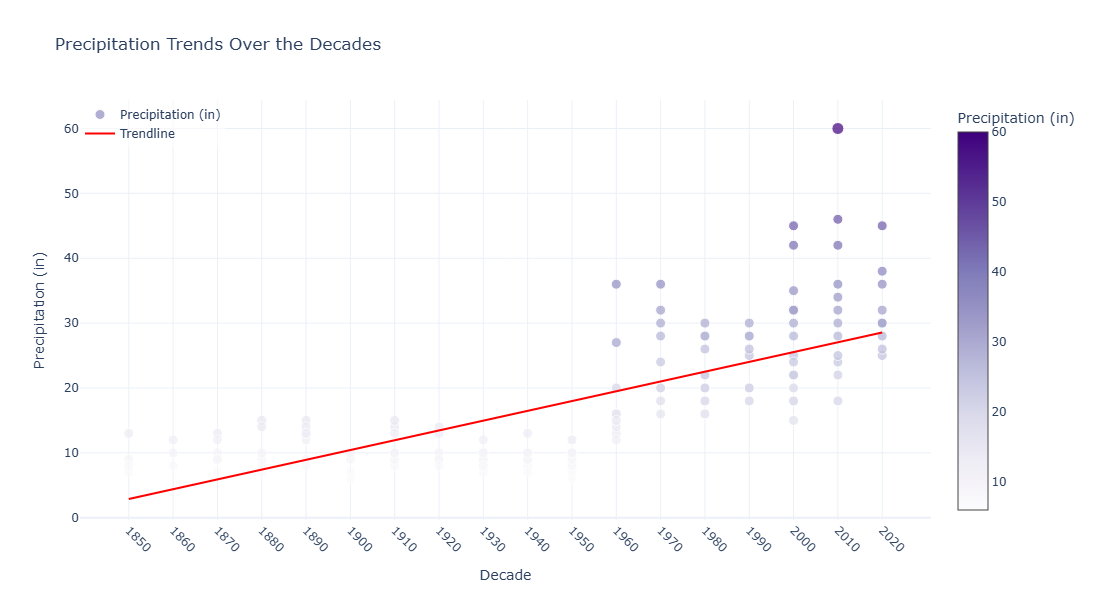

In [297]:
# PLOTTING PRECIPITATION TRENDS OVER THE DECADES - INTERACTIVE GRAPH 

precipitation_values = hurricane_data['Precipitation_Total_in']
# Fit a linear regression line (trendline) for precipitation
z = np.polyfit(decades, precipitation_values, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)
trendline = p(np.sort(np.unique(decades)))

# Create a scatter plot with increased dot sizes
scatter = go.Scatter(
    x=decades,
    y=precipitation_values,
    mode='markers',
    marker=dict(
        size=np.clip(precipitation_values / 5, 10, 80),  # Increased size scaling: Minimum 10, maximum 80
        color=precipitation_values,
        colorscale='Purples',
        showscale=True,
        colorbar=dict(title='Precipitation (in)')
    ),
    name='Precipitation (in)',
    hovertemplate='Storm: %{text}<br>Precipitation: %{y:.2f} in<extra></extra>',
    text=storm_names
)

# Create the trendline
trendline_plot = go.Scatter(
    x=np.sort(np.unique(decades)),
    y=trendline,
    mode='lines',
    line=dict(color='red', width=2),
    name='Trendline',
    hovertemplate='Decade: %{x}<br>Trend: %{y:.2f} in<extra></extra>'
)

# Layout with updated visuals
layout = go.Layout(
    title='Precipitation Trends Over the Decades',
    xaxis=dict(title='Decade', tickvals=np.sort(np.unique(decades)), tickangle=45),
    yaxis=dict(title='Precipitation (in)'),
    template='plotly_white',
    height=600,
    legend=dict(
        x=0,
        y=1,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.5)'
    )
)

# The interactive graph
fig = go.Figure(data=[scatter, trendline_plot], layout=layout)
fig.show()

In [265]:
# Saving the above graph as html to view the interactive graph on gamma
fig.write_html("Precipitation Trends Over the Decades.html")

# Optional: Print a message to confirm
print("HTML file saved as 'Precipitation Trends Over the Decades.html'")

HTML file saved as 'Precipitation Trends Over the Decades.html'


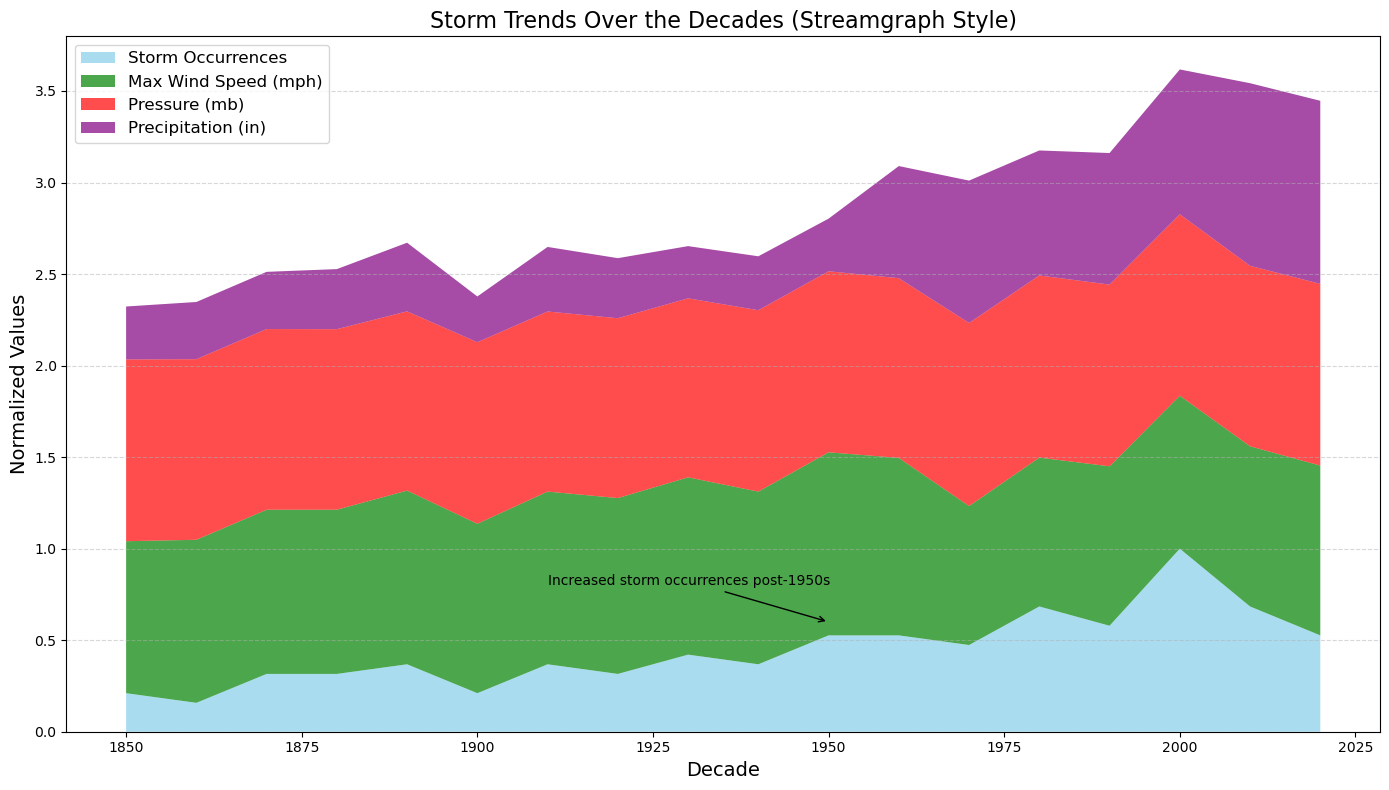

In [318]:
# PLOTTING PRECIPITATION TRENDS OVER THE DECADES - INTERACTIVE GRAPH - WITH THE HELP OF CHATGPT - I PROMPTED GHAPTGPT TO HELP PLOT ALL THE HURRICANE 
# FEATURES IN ONE GRPAH INSTEAD OF SHOWING THEM INDIVIDUALLY AS DONE ABOVE BY NORMALIZING THE DATA SINCE THEY ARE IN DIFFERENT UNITS TO MAKE ALL VALUES
# BETWEEN 0 -#FOR BETTER VISUAL REPRESENTATION. 

# Storm Trend over the Decades

hurricane_data['Decade'] = (hurricane_data['Year'] // 10) * 10
decades = hurricane_data.groupby('Decade').agg({
    'Hurricane_Name': 'count',
    'Max_Wind_Speed_mph': 'mean',
    'Pressure_mb': 'mean',
    'Precipitation_Total_in': 'mean'
}).rename(columns={
    'Hurricane_Name': 'Occurrences',
    'Max_Wind_Speed_mph': 'Max_Wind_Speed_mph',
    'Pressure_mb': 'Pressure_mb',
    'Precipitation_Total_in': 'Precipitation_Total_in'
})

# Prepare data for streamgraph
x = decades.index
storm_occurrences = decades['Occurrences']
max_wind_speed = decades['Max_Wind_Speed_mph']
pressure = decades['Pressure_mb']
precipitation = decades['Precipitation_Total_in']

# Normalize data for visualization
storm_occurrences_norm = storm_occurrences / storm_occurrences.max()
max_wind_speed_norm = max_wind_speed / max_wind_speed.max()
pressure_norm = pressure / pressure.max()
precipitation_norm = precipitation / precipitation.max()

# Stack data to create a streamgraph effect
stream_data = [storm_occurrences_norm, max_wind_speed_norm, pressure_norm, precipitation_norm]

# Create a streamgraph-like stacked area plot
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked area plot
ax.stackplot(
    x, 
    *stream_data,  # Unpack the normalized data for stackplot
    labels=['Storm Occurrences', 'Max Wind Speed (mph)', 'Pressure (mb)', 'Precipitation (in)'], 
    colors=['skyblue', 'green', 'red', 'purple'], 
    alpha=0.7
)

# Add titles and labels
ax.set_title('Storm Trends Over the Decades (Streamgraph Style)', fontsize=16)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.legend(loc='upper left', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add annotations to highlight trends or key metrics
ax.annotate(
    'Increased storm occurrences post-1950s', 
    xy=(1950, 0.6), 
    xytext=(1910, 0.8),
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=10
)

plt.tight_layout()
plt.show()

In [319]:
print("Average Metrics by Decade:")
print(decades.to_string(index=True))

Average Metrics by Decade:
        Occurrences  Max_Wind_Speed_mph  Pressure_mb  Precipitation_Total_in
Decade                                                                      
1850              4          108.750000   958.000000                9.250000
1860              3          116.666667   951.666667               10.000000
1870              6          117.500000   952.000000               10.000000
1880              6          117.500000   951.333333               10.500000
1890              7          124.285714   944.428571               12.000000
1900              4          121.250000   956.500000                8.000000
1910              7          123.571429   949.000000               11.285714
1920              6          125.833333   947.666667               10.500000
1930              8          126.875000   943.375000                9.125000
1940              7          123.571429   955.714286                9.428571
1950             10          131.000000   954.000

In [314]:
# Saving the above graph as html to view the interactive graph on gamma
fig.write_html("Storm Trends Over the Decades (Streamgraph Style).html")

# Optional: Print a message to confirm
print("HTML file saved as 'Storm Trends Over the Decades (Streamgraph Style).html'")

HTML file saved as 'Storm Trends Over the Decades (Streamgraph Style).html'


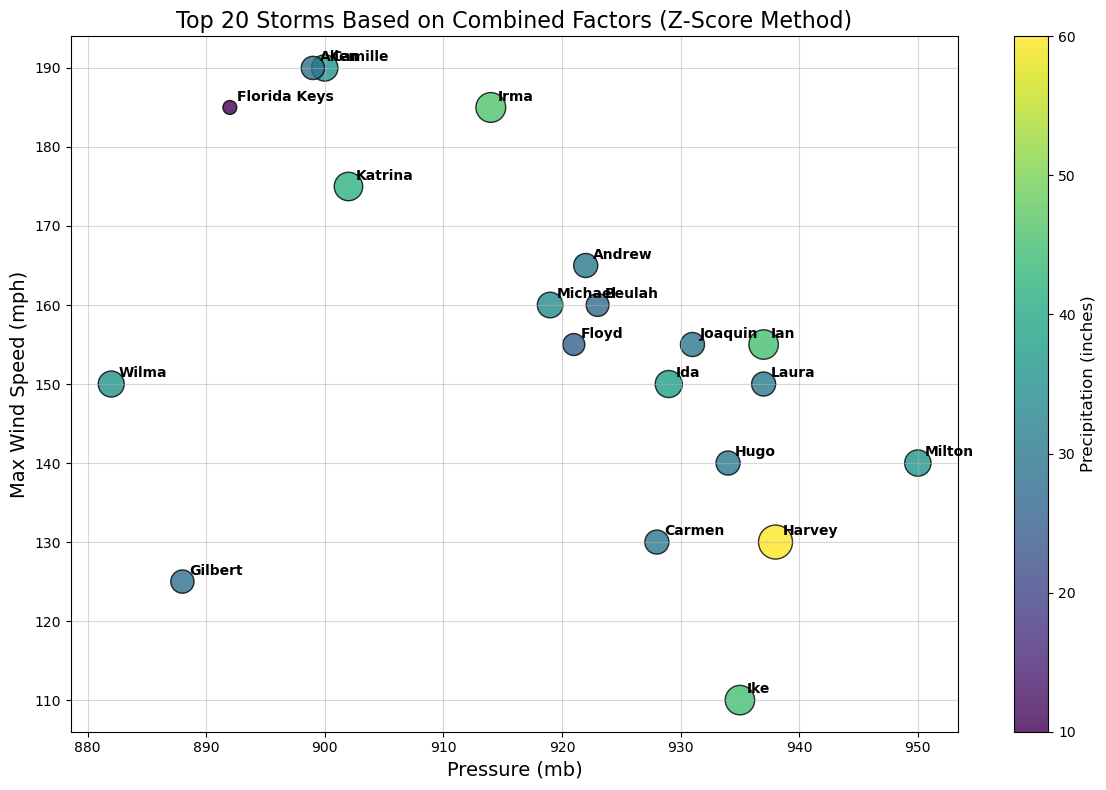

In [300]:
# PLOTTING A GRAPH TO SHOW THE TOP 20 STORMS BY APPLYING THE Z SCORE METHOD. I PROMPTED CHATGPT TP HELP ME PLOT THIS GRAPH - AS I WANTED TO PLOT THE
# TOP 20 STORMS BASED ON OVERALL INTENSITY OF ALL COMBINED FACTORS. THE Z SCORE METHOD CALCULATES THE STANDARD DEVIATION FROM THE AVERAGE AND THAT 
# OUTPUT IS THEN ADDED TO CALCULATE THE INTENSITY SCORE. 

# THIS GRAPH IS PLOTTING BY PRECIPATION SO NOT USEFUL 

# Calculate z-scores for the metrics: Max Wind Speed, Pressure, and Precipitation
hurricane_data['Wind_Speed_Z'] = zscore(hurricane_data['Max_Wind_Speed_mph'])
hurricane_data['Pressure_Z'] = zscore(hurricane_data['Pressure_mb'])
hurricane_data['Precipitation_Z'] = zscore(hurricane_data['Precipitation_Total_in'])

# Combine the z-scores into a single "intensity score"
hurricane_data['Intensity_Score'] = (
    hurricane_data['Wind_Speed_Z'] -  # Higher wind speed is better
    hurricane_data['Pressure_Z'] +  # Lower pressure is better
    hurricane_data['Precipitation_Z']  # Higher precipitation is better
)

# Select the top 20 storms based on the combined intensity score
top_storms_combined = hurricane_data.nlargest(20, 'Intensity_Score')

# Data for plotting
pressures_combined = top_storms_combined['Pressure_mb']
wind_speeds_combined = top_storms_combined['Max_Wind_Speed_mph']
precipitations_combined = top_storms_combined['Precipitation_Total_in']
storm_names_combined = top_storms_combined['Hurricane_Name']

# Scatter plot for the top 20 storms based on combined factors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    pressures_combined, wind_speeds_combined, s=precipitations_combined * 10,
    c=precipitations_combined, cmap='viridis', alpha=0.8, edgecolor='black'
)

# Add labels for the storms
for i, storm in enumerate(storm_names_combined):
    plt.annotate(
        storm, (pressures_combined.iloc[i], wind_speeds_combined.iloc[i]), 
        textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10, fontweight='bold'
    )

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Precipitation (inches)', fontsize=12)

# Add labels and title
plt.title('Top 20 Storms Based on Combined Factors (Z-Score Method)', fontsize=16)
plt.xlabel('Pressure (mb)', fontsize=14)
plt.ylabel('Max Wind Speed (mph)', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [301]:
print("Top 20 Storms Based on Intensity Score:")
print(top_storms_combined[['Hurricane_Name', 'Intensity_Score']])

Top 20 Storms Based on Intensity Score:
    Hurricane_Name  Intensity_Score
14            Irma         6.996393
75         Camille         6.840302
30         Katrina         6.781682
64           Allen         6.102075
32           Wilma         6.082686
13          Harvey         5.237343
3              Ian         4.738704
11         Michael         4.667097
104   Florida Keys         4.472648
51          Andrew         4.323417
5              Ida         4.232678
56         Gilbert         4.197675
79          Beulah         3.798770
16         Joaquin         3.542693
43           Floyd         3.508950
25             Ike         3.164123
7            Laura         3.083907
53            Hugo         2.850574
70          Carmen         2.754089
0           Milton         2.708602


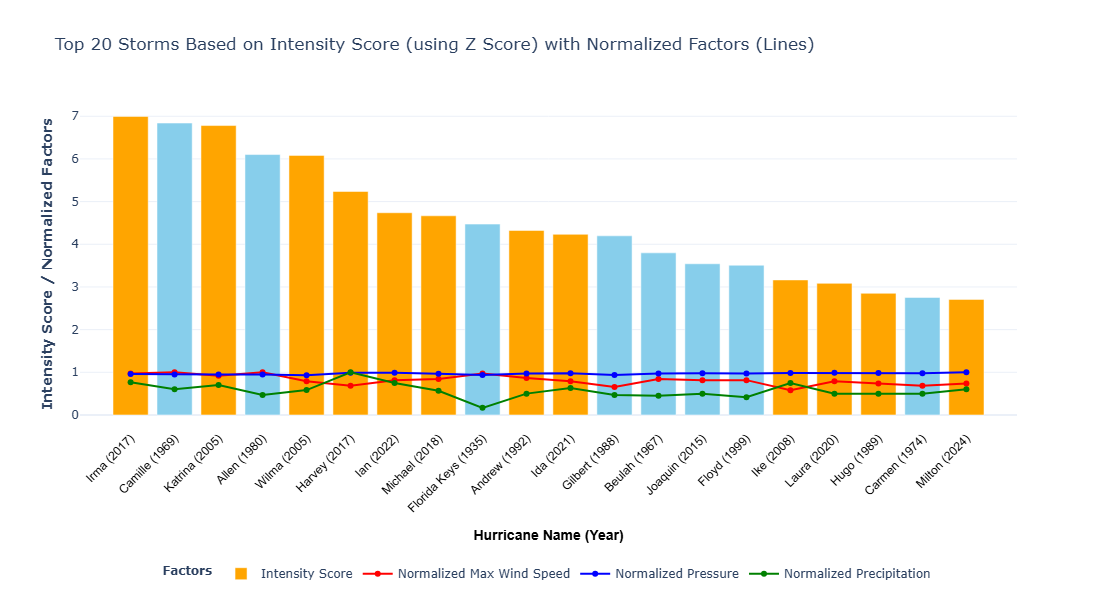

In [302]:
# PLOTTING THE TOP 20 STORMS AS ABOVE EXCEPT MARKING SPECIFIC STORMS IN RED WHICH REPRESENT THE TOP 20 STPORMS IN TERMS OF COST FROM KRISHAN'S GRAPH
import plotly.graph_objects as go

# Define the highlighted storms
highlighted_storms = ['Irma', 'Katrina', 'Wilma', 'Harvey', 'Ian', 'Michael', 
                      'Andrew', 'Ida', 'Ike', 'Laura', 'Milton', 'Hugo']

# Select the top 20 storms based on the combined intensity score
top_storms_combined = hurricane_data.nlargest(20, 'Intensity_Score')

# Sort the storms in descending order of intensity score
top_storms_combined_sorted = top_storms_combined.sort_values(by="Intensity_Score", ascending=False)

# Normalize the factors (Max Wind Speed, Pressure, Precipitation) for better visual representation
top_storms_combined_sorted['Max_Wind_Speed_Norm'] = (
    top_storms_combined_sorted['Max_Wind_Speed_mph'] / top_storms_combined_sorted['Max_Wind_Speed_mph'].max()
)
top_storms_combined_sorted['Pressure_Norm'] = (
    top_storms_combined_sorted['Pressure_mb'] / top_storms_combined_sorted['Pressure_mb'].max()
)
top_storms_combined_sorted['Precipitation_Norm'] = (
    top_storms_combined_sorted['Precipitation_Total_in'] / top_storms_combined_sorted['Precipitation_Total_in'].max()
)

# Create a list for bar colors: highlight selected storms
bar_colors = ['orange' if storm in highlighted_storms else 'skyblue' for storm in top_storms_combined_sorted['Hurricane_Name']]

# Add hover text for wind speed, pressure, and precipitation
hover_text = [
    f"Year: {row['Year']}<br>"  # Include the year in hover text
    f"Wind Speed: {row['Max_Wind_Speed_mph']} mph<br>"
    f"Pressure: {row['Pressure_mb']} mb<br>"
    f"Precipitation: {row['Precipitation_Total_in']} inches"
    for _, row in top_storms_combined_sorted.iterrows()
]

fig = go.Figure()

# Add bars for intensity score
fig.add_trace(go.Bar(
    x=[f"{name} ({year})" for name, year in zip(top_storms_combined_sorted['Hurricane_Name'], top_storms_combined_sorted['Year'])],
    y=top_storms_combined_sorted['Intensity_Score'],
    marker=dict(color=bar_colors),
    name="Intensity Score",
    hovertext=hover_text,
    hoverinfo='text'
))

# Add line for normalized wind speed
fig.add_trace(go.Scatter(
    x=[f"{name} ({year})" for name, year in zip(top_storms_combined_sorted['Hurricane_Name'], top_storms_combined_sorted['Year'])],
    y=top_storms_combined_sorted['Max_Wind_Speed_Norm'],
    mode='lines+markers',
    name="Normalized Max Wind Speed",
    line=dict(color='red', width=2),
    marker=dict(size=6),
    hovertemplate='Normalized Max Wind Speed: %{y:.2f}<br>Storm: %{x}<extra></extra>'
))

# Add line for normalized pressure
fig.add_trace(go.Scatter(
    x=[f"{name} ({year})" for name, year in zip(top_storms_combined_sorted['Hurricane_Name'], top_storms_combined_sorted['Year'])],
    y=top_storms_combined_sorted['Pressure_Norm'],
    mode='lines+markers',
    name="Normalized Pressure",
    line=dict(color='blue', width=2),
    marker=dict(size=6),
    hovertemplate='Normalized Pressure: %{y:.2f}<br>Storm: %{x}<extra></extra>'
))

# Add line for normalized precipitation
fig.add_trace(go.Scatter(
    x=[f"{name} ({year})" for name, year in zip(top_storms_combined_sorted['Hurricane_Name'], top_storms_combined_sorted['Year'])],
    y=top_storms_combined_sorted['Precipitation_Norm'],
    mode='lines+markers',
    name="Normalized Precipitation",
    line=dict(color='green', width=2),
    marker=dict(size=6),
    hovertemplate='Normalized Precipitation: %{y:.2f}<br>Storm: %{x}<extra></extra>'
))

# Update layout for better visuals
fig.update_layout(
    title="Top 20 Storms Based on Intensity Score (using Z Score) with Normalized Factors (Lines)",
    xaxis_title="<b>Hurricane Name (Year)</b>",
    yaxis_title="<b>Intensity Score / Normalized Factors</b>",
    template="plotly_white",
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for readability
        title_font=dict(size=14, family="Arial", color="black"),  # Font size, family, and color for title
        tickfont=dict(size=12, family="Arial", color="black"),  # Font size, family, and color for tick labels
    ),
    legend=dict(
        title=dict(text="<b>Factors</b>", font=dict(size=12)),  # Bold legend title using <b>
        font=dict(size=12),  # Adjust legend font size
        orientation="h",  # Horizontal legend
        x=0.5,  # Center the legend horizontally
        xanchor="center",
        y=-0.4  # Move legend below the x-axis
    ),
    width=1200,  # Graph width
    height=600   # Graph height
)
# Display the updated interactive plot
fig.show()

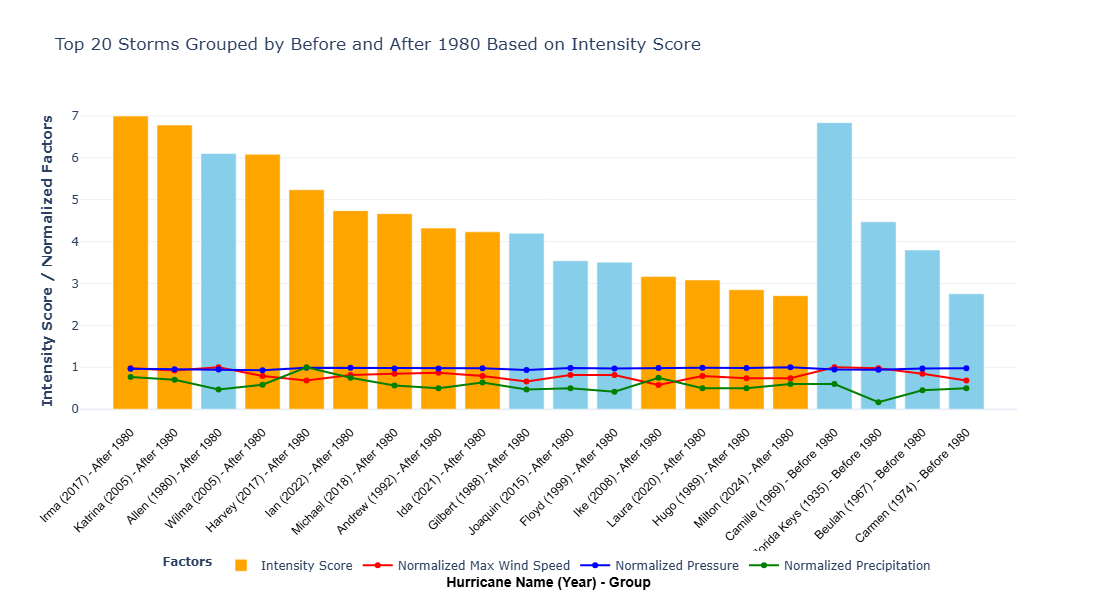

In [280]:
import plotly.graph_objects as go

# Define the highlighted storms
highlighted_storms = ['Irma', 'Katrina', 'Wilma', 'Harvey', 'Ian', 'Michael', 
                      'Andrew', 'Ida', 'Ike', 'Laura', 'Milton', 'Hugo']

# Select the top 20 storms based on the combined intensity score
top_storms_combined = hurricane_data.nlargest(20, 'Intensity_Score')

# Add a column to classify storms as "Before 1980" or "After 1980"
top_storms_combined['Year_Group'] = top_storms_combined['Year'].apply(lambda x: 'Before 1980' if x < 1980 else 'After 1980')

# Sort storms by intensity score and year group
top_storms_combined_sorted = top_storms_combined.sort_values(by=['Year_Group', 'Intensity_Score'], ascending=[True, False])

# Normalize the factors (Max Wind Speed, Pressure, Precipitation) for better visual representation
top_storms_combined_sorted['Max_Wind_Speed_Norm'] = (
    top_storms_combined_sorted['Max_Wind_Speed_mph'] / top_storms_combined_sorted['Max_Wind_Speed_mph'].max()
)
top_storms_combined_sorted['Pressure_Norm'] = (
    top_storms_combined_sorted['Pressure_mb'] / top_storms_combined_sorted['Pressure_mb'].max()
)
top_storms_combined_sorted['Precipitation_Norm'] = (
    top_storms_combined_sorted['Precipitation_Total_in'] / top_storms_combined_sorted['Precipitation_Total_in'].max()
)

# Create a list for bar colors: highlight selected storms
bar_colors = ['orange' if storm in highlighted_storms else 'skyblue' for storm in top_storms_combined_sorted['Hurricane_Name']]

# Add hover text for wind speed, pressure, and precipitation
hover_text = [
    f"Year: {row['Year']}<br>"  # Include the year in hover text
    f"Wind Speed: {row['Max_Wind_Speed_mph']} mph<br>"
    f"Pressure: {row['Pressure_mb']} mb<br>"
    f"Precipitation: {row['Precipitation_Total_in']} inches"
    for _, row in top_storms_combined_sorted.iterrows()
]

fig = go.Figure()

# Add bars for intensity score
fig.add_trace(go.Bar(
    x=[f"{name} ({year}) - {group}" for name, year, group in zip(top_storms_combined_sorted['Hurricane_Name'], 
                                                                 top_storms_combined_sorted['Year'], 
                                                                 top_storms_combined_sorted['Year_Group'])],
    y=top_storms_combined_sorted['Intensity_Score'],
    marker=dict(color=bar_colors),
    name="Intensity Score",
    hovertext=hover_text,
    hoverinfo='text'
))

# Add line for normalized wind speed
fig.add_trace(go.Scatter(
    x=[f"{name} ({year}) - {group}" for name, year, group in zip(top_storms_combined_sorted['Hurricane_Name'], 
                                                                 top_storms_combined_sorted['Year'], 
                                                                 top_storms_combined_sorted['Year_Group'])],
    y=top_storms_combined_sorted['Max_Wind_Speed_Norm'],
    mode='lines+markers',
    name="Normalized Max Wind Speed",
    line=dict(color='red', width=2),
    marker=dict(size=6),
    hovertemplate='Normalized Max Wind Speed: %{y:.2f}<br>Storm: %{x}<extra></extra>'
))

# Add line for normalized pressure
fig.add_trace(go.Scatter(
    x=[f"{name} ({year}) - {group}" for name, year, group in zip(top_storms_combined_sorted['Hurricane_Name'], 
                                                                 top_storms_combined_sorted['Year'], 
                                                                 top_storms_combined_sorted['Year_Group'])],
    y=top_storms_combined_sorted['Pressure_Norm'],
    mode='lines+markers',
    name="Normalized Pressure",
    line=dict(color='blue', width=2),
    marker=dict(size=6),
    hovertemplate='Normalized Pressure: %{y:.2f}<br>Storm: %{x}<extra></extra>'
))

# Add line for normalized precipitation
fig.add_trace(go.Scatter(
    x=[f"{name} ({year}) - {group}" for name, year, group in zip(top_storms_combined_sorted['Hurricane_Name'], 
                                                                 top_storms_combined_sorted['Year'], 
                                                                 top_storms_combined_sorted['Year_Group'])],
    y=top_storms_combined_sorted['Precipitation_Norm'],
    mode='lines+markers',
    name="Normalized Precipitation",
    line=dict(color='green', width=2),
    marker=dict(size=6),
    hovertemplate='Normalized Precipitation: %{y:.2f}<br>Storm: %{x}<extra></extra>'
))

# Update layout for better visuals
fig.update_layout(
    title="Top 20 Storms Grouped by Before and After 1980 Based on Intensity Score",
    xaxis_title="<b>Hurricane Name (Year) - Group</b>",
    yaxis_title="<b>Intensity Score / Normalized Factors</b>",
    template="plotly_white",
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for readability
        title_font=dict(size=14, family="Arial", color="black"),  # Font size, family, and color for title
        tickfont=dict(size=12, family="Arial", color="black"),  # Font size, family, and color for tick labels
    ),
    legend=dict(
        title=dict(text="<b>Factors</b>", font=dict(size=12)),  # Bold legend title using <b>
        font=dict(size=12),  # Adjust legend font size
        orientation="h",  # Horizontal legend
        x=0.5,  # Center the legend horizontally
        xanchor="center",
        y=-0.4  # Move legend below the x-axis
    ),
    width=1200,  # Graph width
    height=600   # Graph height
)
# Display the updated interactive plot
fig.show()

In [281]:
# Saving the above graph as html to view the interactive graph on gamma
fig.write_html("Top 20 Storms Grouped by Before and After 1980 Based on Intensity Score.html")

# Optional: Print a message to confirm
print("HTML file saved as 'Top 20 Storms Grouped by Before and After 1980 Based on Intensity Scorey.html'")

HTML file saved as 'Top 20 Storms Grouped by Before and After 1980 Based on Intensity Scorey.html'


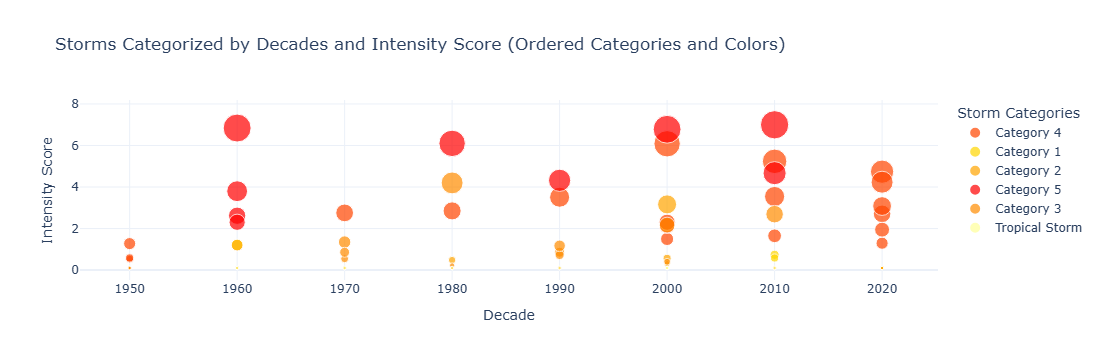

In [282]:
# Filter data for storms from 1950 onwards
# Ensure all intensity scores are non-negative
filtered_data_1950['Intensity_Score'] = filtered_data_1950['Intensity_Score'].clip(lower=0.1)  # Avoid zero size dots

# Reorder the category legend
filtered_data_1950['Category'] = pd.Categorical(
    filtered_data_1950['Category'],
    categories=['Category 5', 'Category 4', 'Category 3', 'Category 2', 'Category 1', 'Tropical Storm'],
    ordered=False
)

# Define a custom color scheme for storm categories (lighter to darker: yellow to red)
category_colors = {
    'Tropical Storm': '#FFFF99',  # Light Yellow
    'Category 1': '#FFD700',  # Gold
    'Category 2': '#FFA500',  # Orange
    'Category 3': '#FF8C00',  # Dark Orange
    'Category 4': '#FF4500',  # Red-Orange
    'Category 5': '#FF0000'   # Red
}

# Create an interactive scatter plot with corrected legend order
fig = px.scatter(
    filtered_data_1950,
    x='Decade',
    y='Intensity_Score',
    size='Intensity_Score',  # Dot size scaled by hurricane intensity
    color='Category',  # Assign a unique color to each category
    color_discrete_map=category_colors,  # Map custom colors to categories
    hover_name='Hurricane_Name',  # Show hurricane names on hover
    title="Storms Categorized by Decades and Intensity Score (Ordered Categories and Colors)",
    labels={
        'Decade': 'Decade',
        'Intensity_Score': 'Hurricane Intensity',
    #    'Category': 'Storm Category'
    }
)

# Update layout for better visuals and ordered legend
fig.update_layout(
    legend=dict(
        title='Storm Categories',
        traceorder='normal'  # Maintain the natural category order
    ),
    xaxis_title='Decade',
    yaxis_title='Intensity Score',
    template='plotly_white',
    xaxis=dict(tickmode='linear', dtick=10)  # Ensure decades are evenly spaced
)

# Display the interactive plot
fig.show()

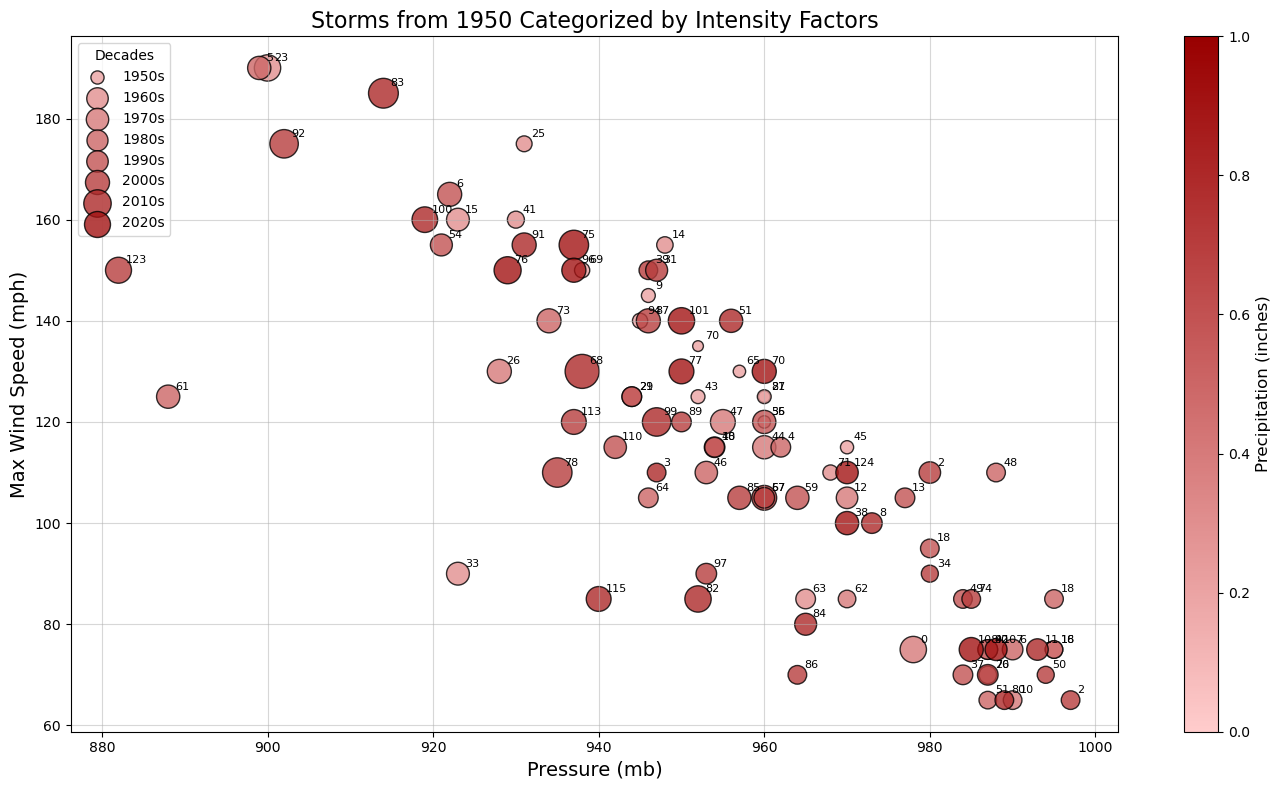

In [185]:
# PLOTTING STORMS SINCE 1950S TO UNDERSTAND IF INTENSITY HAS INCREASED OVER THE DECADES 

from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap from light to dark red
reds_colormap = LinearSegmentedColormap.from_list("reds", ["#FFCCCC", "#990000"])
colors_intensity = reds_colormap(np.linspace(0.2, 0.9, len(unique_decades_1950)))

# Map decades to the new red intensity colors
decade_color_map_intensity = {decade: colors_intensity[i] for i, decade in enumerate(unique_decades_1950)}

# Plot scatter points with the new red intensity palette
plt.figure(figsize=(14, 8))
for decade in unique_decades_1950:
    decade_data = filtered_data_1950[filtered_data_1950['Decade'] == decade]
    plt.scatter(
        decade_data['Pressure_mb'], 
        decade_data['Max_Wind_Speed_mph'], 
        s=decade_data['Precipitation_Total_in'] * 10,  # Dot size scaled by precipitation
        color=decade_color_map_intensity[decade],
        alpha=0.8,
        edgecolor='black',
        label=f"{decade}s",
            )

# Add annotations for some storms (optional)
for i in range(len(filtered_data_1950)):
    plt.annotate(
        storm_names_1950.iloc[i], 
        (pressures_1950.iloc[i], wind_speeds_1950.iloc[i]), 
        textcoords="offset points", xytext=(5, 5), ha='left', fontsize=8
    )

# Add legend for decades
plt.legend(title="Decades", fontsize=10, loc='upper left')

# Add colorbar for precipitation
scatter = plt.scatter([], [], s=[], c=[], cmap=reds_colormap)  # Placeholder for colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Precipitation (inches)', fontsize=12)

# Add labels and title
plt.title('Storms from 1950 Categorized by Intensity Factors', fontsize=16)
plt.xlabel('Pressure (mb)', fontsize=14)
plt.ylabel('Max Wind Speed (mph)', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

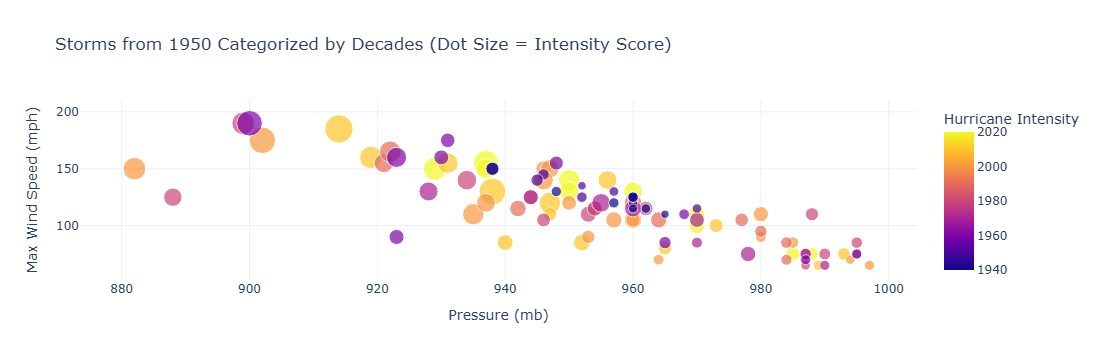

In [188]:
# Ensure all intensity scores are non-negative
hurricane_data['Intensity_Score'] = hurricane_data['Intensity_Score'].clip(lower=0)

# Filter data from 1950 onwards
filtered_data_1950 = hurricane_data[hurricane_data['Decade'] >= 1940]

# Unique decades for coloring
unique_decades_1950 = sorted(filtered_data_1950['Decade'].unique())

# Prepare a red colormap with enough steps for the unique decades
reds_colormap = px.colors.sequential.Reds
num_colors = min(len(unique_decades_1950), len(reds_colormap))
colors_intensity = np.linspace(0, len(reds_colormap) - 1, num_colors).astype(int)
decade_color_map_intensity = {
    decade: reds_colormap[color] for decade, color in zip(unique_decades_1950, colors_intensity)
}

# Create an interactive scatter plot with dot size based on hurricane intensity
fig = px.scatter(
    filtered_data_1950,
    x='Pressure_mb',
    y='Max_Wind_Speed_mph',
    size='Intensity_Score',  # Dot size scaled by hurricane intensity
    color='Decade',
    color_discrete_map=decade_color_map_intensity,  # Use the custom red palette
    hover_name='Hurricane_Name',  # Show hurricane names on hover
    title="Storms from 1950 Categorized by Decades (Dot Size = Intensity Score)",
    labels={
        'Pressure_mb': 'Pressure (mb)',
        'Max_Wind_Speed_mph': 'Max Wind Speed (mph)',
        'Intensity_Score': 'Hurricane Intensity',
        'Decade': 'Decade'
    }
)

# Update layout for better visuals
fig.update_layout(
    legend_title_text='Decades',
    xaxis_title='Pressure (mb)',
    yaxis_title='Max Wind Speed (mph)',
    coloraxis_colorbar=dict(title='Hurricane Intensity'),
    template='plotly_white'
)

# Display the interactive plot
fig.show()

In [187]:
# Saving the above graph as html to view the interactive graph on gamma
fig.write_html("Storms from 1950 Categorized by Decades (Dot Size = Intensity Score).html")

# Optional: Print a message to confirm
print("HTML file saved as 'Storms from 1950 Categorized by Decades (Dot Size = Intensity Score).html'")

HTML file saved as 'Storms from 1950 Categorized by Decades (Dot Size = Intensity Score).html'


# 3. ORIGINAL BASIC VISUALS I CREATED WHICH WERE MODIFIED ABOVE BASED ON SPECIFIC GRAPH STYLES FROM THE PYTHON GRAPHS LIBRARY AND MADE INTERACTIVE USING CHATGPT 

In [ ]:
# Frequency of storms by decades 

# Calculate the decade
hurricane_data['Decade'] = (hurricane_data['Year'] // 10) * 10
hurricane_decade_counts = hurricane_data.groupby('Decade').size()
decades = hurricane_decade_counts.index
occurrences = hurricane_decade_counts.values

# Plot a linear regression line (trendline)
z = np.polyfit(decades, occurrences, 1) 
p = np.poly1d(z)

# Plot the bar chart with the trendline
plt.figure(figsize=(12, 6))
plt.bar(decades, occurrences, color='skyblue', edgecolor='black', label='Storm Occurrences', width=6)

# Plot the trendline
plt.plot(decades, p(decades), color='red', linewidth=2, label='Trendline')

# Add title, labels, and legend
plt.title('Total Storm Occurrences Grouped by Decades (1851 and onwards)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Hurricanes', fontsize=14)
plt.xticks(decades, rotation=45)  # Ensure x-ticks align with decades
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Wind pressure trends over the decades
pressure_values = hurricane_data['Pressure_mb']

# Fit a linear regression line (trendline) for pressure values
z = np.polyfit(decades, pressure_values, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)

# Plot a linear regression line (trendline)
plt.figure(figsize=(12, 8))
plt.scatter(decades, pressure_values, c=pressure_values, s=pressure_values * 0.4, 
            cmap='Reds', alpha=0.8, edgecolor='black', label='Pressure (mb)')

# Plot the trendline
plt.plot(sorted(decades.unique()), p(sorted(decades.unique())), color='blue', linewidth=2, label='Trendline')

# Add title, labels, and legend
plt.title('Atmospheric Pressure Trends Over the Decades', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Atmospheric Pressure (mb)', fontsize=14)
plt.xticks(sorted(decades.unique()), rotation=45)
plt.colorbar(label='Pressure (mb)', orientation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(decades, precipitation_values, c=precipitation_values, s=precipitation_values * 20, 
            cmap='Purples', alpha=0.8, edgecolor='black', label='Precipitation (in)')

# Plot the trendline
plt.plot(sorted(decades.unique()), p(sorted(decades.unique())), color='green', linewidth=2, label='Trendline')

# Add title, labels, and legend
plt.title('Precipitation Trends Over the Decades', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Precipitation (inches)', fontsize=14)
plt.xticks(sorted(decades.unique()), rotation=45)
plt.colorbar(label='Precipitation (in)', orientation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
# Precipitation trends over the decades
precipitation_values = hurricane_data['Precipitation_Total_in']

# Fit a linear regression line (trendline) for pressure values
z = np.polyfit(decades, precipitation_values, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)

# Plotting the scatter plot with the trendline
plt.figure(figsize=(12, 6))
plt.scatter(decades, precipitation_values, color='blue', alpha=0.7, label='Wind Pressures (mb)')

# Plot the trendline
plt.plot(sorted(decades.unique()), p(sorted(decades.unique())), color='red', linewidth=2, label='Trendline')

# Add title, labels, and legend
plt.title('Precipitation by Decade with Trendline', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Precipation in Inches', fontsize=14)
plt.xticks(sorted(decades.unique()), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Precipitation trends over the decades
precipitation_values = hurricane_data['Precipitation_Total_in']  # Correct column name
decades = hurricane_data['Decade']  # Ensure the decade data is correct

# Fit a linear regression line (trendline) for precipitation values
z = np.polyfit(decades, precipitation_values, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)

# Plotting the scatter plot with the trendline
plt.figure(figsize=(12, 8))
plt.scatter(
    decades,
    precipitation_values,
    c=precipitation_values,
    s=precipitation_values * 5,  # Increased size of dots
    cmap='Purples',
    alpha=0.8,
    edgecolor='black',
    label='Precipitation (in)'
)

# Plot the trendline
unique_decades = sorted(decades.unique())
plt.plot(
    unique_decades,
    p(unique_decades),
    color='red',
    linewidth=2,
    label='Trendline'
)

# Add title, labels, and legend
plt.title('Precipitation Trends Over the Decades', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Precipitation (in)', fontsize=14)
plt.xticks(unique_decades, rotation=45)
plt.colorbar(label='Precipitation (in)', orientation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Wind pressure trends over the decades
pressure_values = hurricane_data['Pressure_mb']

# Fit a linear regression line (trendline) for pressure values
z = np.polyfit(decades, pressure_values, 1)  # Degree 1 for a linear trend
p = np.poly1d(z)

# Plotting the scatter plot with the trendline
plt.figure(figsize=(12, 6))
plt.scatter(decades, pressure_values, color='blue', alpha=0.7, label='Wind Pressures (mb)')

# Add the trendline
plt.plot(sorted(decades.unique()), p(sorted(decades.unique())), color='red', linewidth=2, label='Trendline')

# Add title, labels, and legend
plt.title('Wind Pressure by Decade with Trendline', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Wind Pressure (mb)', fontsize=14)
plt.xticks(sorted(decades.unique()), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Extract maximum wind speed for each hurricane and the decade it belongs to 
decades = hurricane_data['Decade']
max_wind_speeds = hurricane_data['Max_Wind_Speed_mph']

# a linear regression line (trendline) for wind speeds
z = np.polyfit(decades, max_wind_speeds, 1) 
p = np.poly1d(z)

# Plotting the scatter plot with the trendline
plt.figure(figsize=(12, 6))
plt.scatter(decades, max_wind_speeds, color='blue', alpha=0.7, label='Wind Pressures (mb)')

# Plot the trendline
plt.plot(sorted(decades.unique()), p(sorted(decades.unique())), color='red', linewidth=2, label='Trendline')

# Plotting the scatter plot
plt.title('Maximum Wind Speeds by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Max Wind Speed (mph)', fontsize=14)
plt.xticks(sorted(decades.unique()), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Combining the two graphs into 1 - used chatgpt to help fix the code

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot scatter for max wind speeds with trendline on the primary y-axis
ax1.scatter(decades, max_wind_speeds, color='blue', alpha=0.7, label='Max Wind Speeds (mph)')
trendline_wind_speeds = np.polyfit(decades, max_wind_speeds, 1)
ax1.plot(sorted(decades.unique()), np.poly1d(trendline_wind_speeds)(sorted(decades.unique())), 
         color='green', linewidth=2, label='Trendline (Wind Speeds)')
ax1.set_ylabel('Max Wind Speed (mph)', fontsize=14)
ax1.set_xlabel('Decade', fontsize=14)
ax1.tick_params(axis='y')
ax1.set_xticks(sorted(hurricane_decade_counts.index))
ax1.set_xticklabels(sorted(hurricane_decade_counts.index), rotation=45)

# Create a secondary y-axis for hurricane occurrences
ax2 = ax1.twinx()
ax2.bar(hurricane_decade_counts.index, hurricane_decade_counts.values, 
        color='skyblue', edgecolor='black', width=8, alpha=0.6, label='Storm Occurrences')
trendline_occurrences = np.polyfit(hurricane_decade_counts.index, hurricane_decade_counts.values, 1)
ax2.plot(hurricane_decade_counts.index, np.poly1d(trendline_occurrences)(hurricane_decade_counts.index), 
         color='red', linewidth=2, label='Trendline (Occurrences)')
ax2.set_ylabel('Storm Occurrences', fontsize=14)
ax2.tick_params(axis='y')

# Add title and legends
fig.suptitle('Storm Occurrences and Max Wind Speeds by Decade', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()